In [111]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [4]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\archive (33)\apple_quality.csv")

In [5]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [9]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [14]:
df.drop('A_id', axis=1, inplace=True)

In [15]:
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


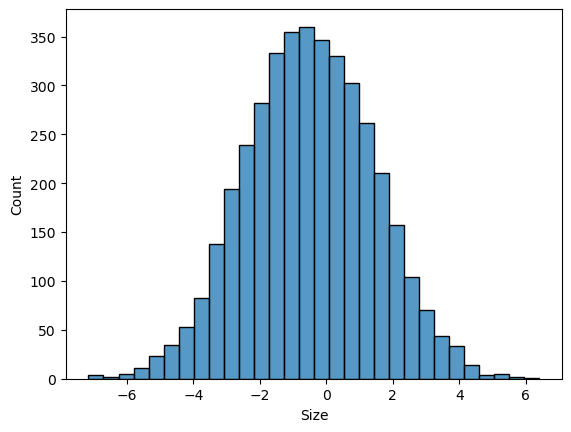

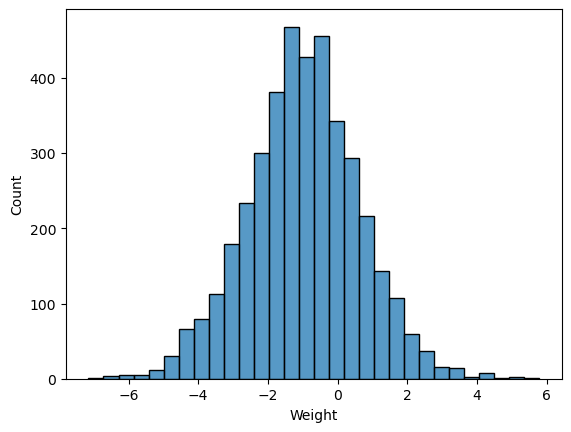

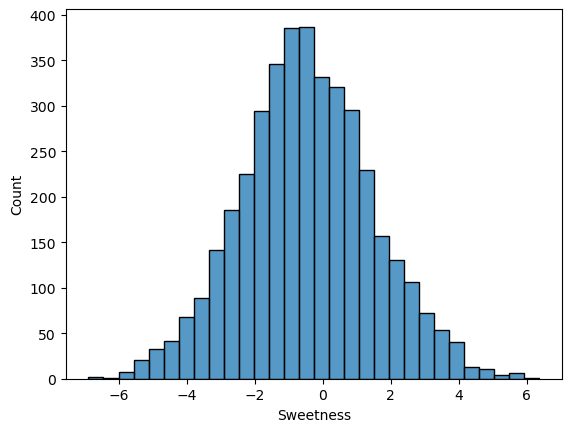

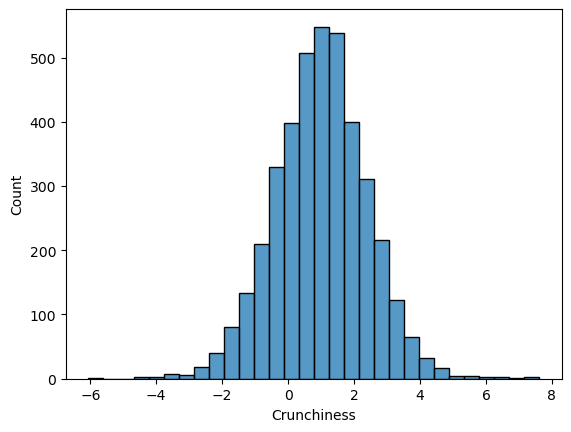

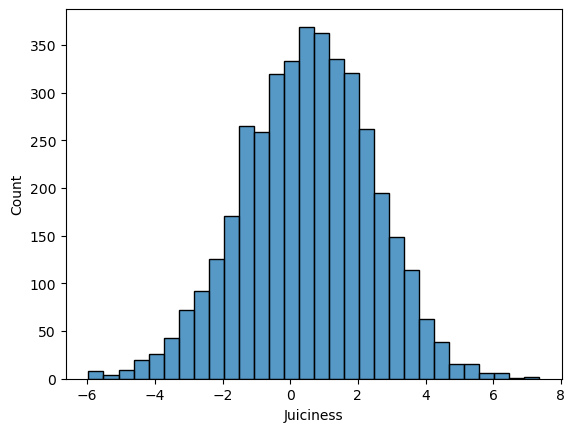

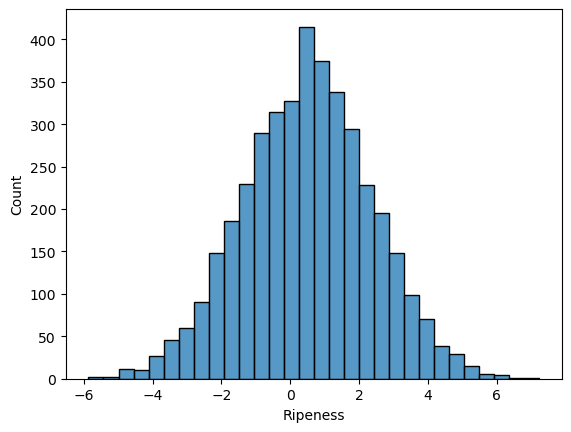

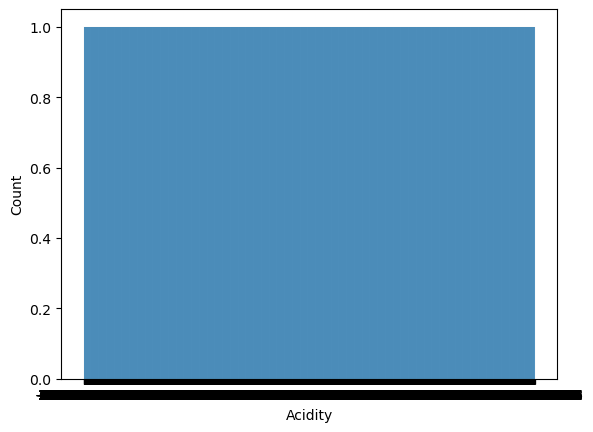

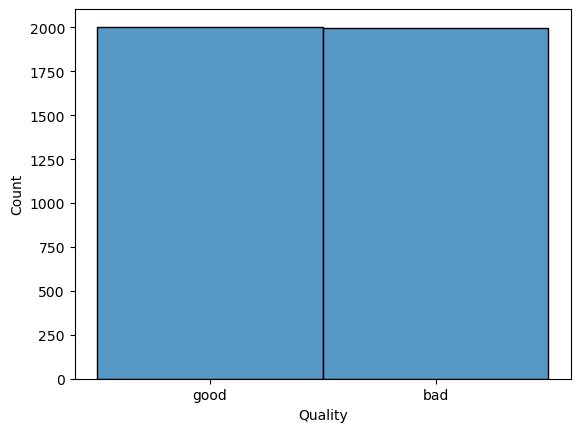

In [19]:
for col in df.columns:
    sns.histplot(df[col], bins=30)
    plt.show()

In [25]:
skewness = df.iloc[:,:-1].skew()
skewness.sort_values(ascending=False)

Sweetness       0.08385
Acidity        0.055783
Weight         0.003102
Crunchiness     0.00023
Size          -0.002437
Ripeness      -0.008764
Juiciness     -0.113421
dtype: object

I can see that most of the features are normally distributed which is a good sign

In [27]:
df.Quality.value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

So the skewness and imbalance are not severe so I don't have to hanlde skewness but still i will consider using weighted methods for the imbalance afterward 

In [28]:
label = LabelEncoder()
df['Quality'] = label.fit_transform(df['Quality'])
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


So i have applied Label Encoder for our categorical target, in which 'Good' is 1 and 'Bad' is 0 

Quality        1.000000
Juiciness      0.260223
Sweetness      0.250998
Size           0.244007
Weight         0.001421
Acidity       -0.007697
Crunchiness   -0.012376
Ripeness      -0.264315
Name: Quality, dtype: float64


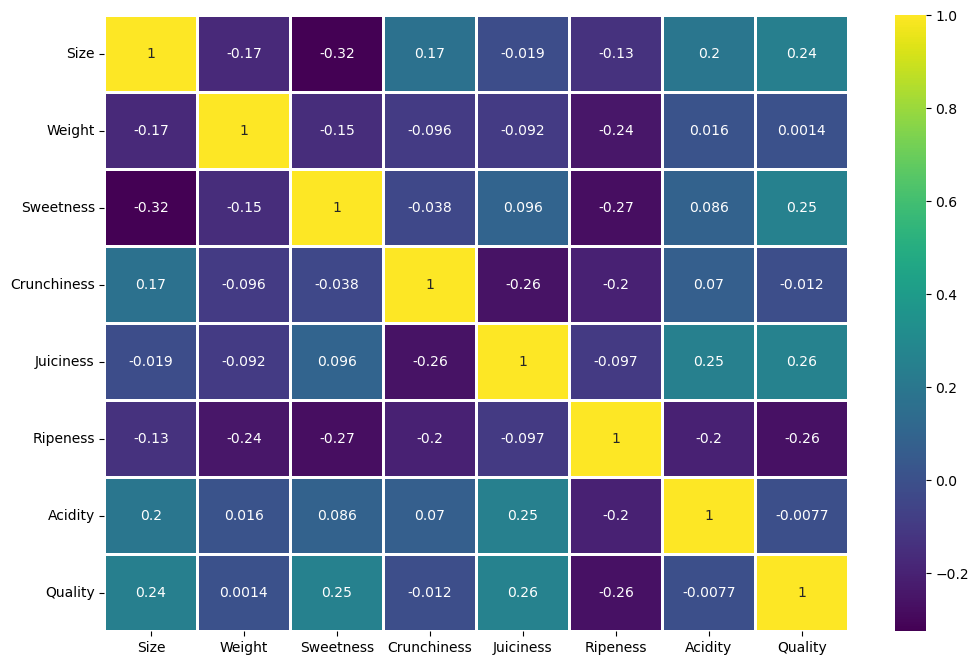

In [38]:
correlation_result = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_result, annot=True, cmap='viridis', lw=1)
print(correlation_result['Quality'].sort_values(ascending=False))

In [39]:
def standardize_(df, target):
    X, y = df.drop(target, axis=1), df[target]
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
    scale = RobustScaler()
    X_train_scaled = scale.fit_transform(X_train)
    X_test_scaled = scale.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test 

I just created a function in which it will help me split the dataset into X and Y - the  target. Then a split them into traning and testing dataset then I scaled the training and testing of the X datset using RobustScaler method

In [47]:
X_train, X_test, y_train, y_test = standardize_(df, 'Quality')
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
cv_score_lr = cross_val_score(lr, X_test, y_test, cv=5)
print(cv_score_lr)
print('Mean cv score', cv_score_lr.mean())

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

[0.7625  0.76875 0.75    0.775   0.75625]
Mean cv score 0.7625


I wanted to create a base-line model, in this case is LogisticRegression, for comparing with other advanced machine learning models. The result is fairly good with the score of 76%

Now I will use Adaboosting, GradientBoosting and randomforest for cross-validation and tuning 

In [65]:
ada_clf = AdaBoostClassifier(
    n_estimators=100,       
    learning_rate=1.0,   
    algorithm='SAMME.R', 
    random_state=None    
)

gradient_clf = GradientBoostingClassifier(
    loss='deviance',   
    learning_rate=0.1,     
    n_estimators=100,     
    subsample=1.0,         
    criterion='friedman_mse',  
    min_samples_split=2,  
    min_samples_leaf=1,   
    min_weight_fraction_leaf=0.0,  
    max_depth=3,          
    min_impurity_decrease=0.0,    
    init=None,             
    random_state=None,     
    max_features=None,     
    verbose=0,             
    max_leaf_nodes=None,   
    warm_start=False,     
    validation_fraction=0.1, 
    n_iter_no_change=None, 
    tol=0.0001             
)


random_forest_clf = RandomForestClassifier(
    n_estimators=100,      
    criterion='gini',     
    max_depth=None,       
    min_samples_split=2,   
    min_samples_leaf=1,   
    min_weight_fraction_leaf=0.0,  
    max_features='auto',   
    max_leaf_nodes=None,  
    min_impurity_decrease=0.0,     
    bootstrap=True,        
    oob_score=False,       
    n_jobs=None,           
    random_state=None,    
    verbose=0,             
    warm_start=False,      
    class_weight=None    
)

In [66]:
X_train, X_test, y_train, y_test = standardize_(df, 'Quality')

estimators = [ada_clf, gradient_clf, random_forest_clf]
for model in estimators:
    model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [61]:
[model.score(X_test,y_test) for model in estimators]

[0.78625, 0.87, 0.90875]

In [64]:
[model.score(X_test,y_test) for model in estimators]

[0.77625, 0.87, 0.9075]

In [67]:
[model.score(X_test,y_test) for model in estimators]

[0.78625, 0.87, 0.90125]

In [71]:
named_estimators = [
    ('ada', ada_clf),
    ('gra', gradient_clf),
    ('ran', random_forest_clf)
]
voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


VotingClassifier(estimators=[('ada', AdaBoostClassifier(n_estimators=100)),
                             ('gra',
                              GradientBoostingClassifier(loss='deviance')),
                             ('ran',
                              RandomForestClassifier(max_features='auto'))])

In [72]:
voting_clf.score(X_train, y_train)


0.9209375

voting_clf.voting = "soft"
voting_clf.score(X_test, y_test)

In [75]:
voting_clf.voting = "soft"
voting_clf.score(X_test, y_test)

0.89375

In [76]:
voting_clf.voting = "hard"
voting_clf.score(X_test, y_test)

0.87625

So basically the voting using those classifiers is performing better 
But maybe i can improve this by using grid search firt based on individual model first then i would try voting latter on 
    

In [80]:
X_train, X_test, y_train, y_test = standardize_(df, 'Quality')
ada_clf_2 = AdaBoostClassifier()

param_grid_for_ada = {
    'n_estimators' : [50, 100, 200],
    'learning_rate' : [0.1, 0.5, 1.0, 1.5, 2.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state' : [42, None]
}

grid_search_for_ada = GridSearchCV(ada_clf_2, param_grid_for_ada, cv=5, n_jobs=-1)
grid_search_for_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [50, 100, 200],
                         'random_state': [42, None]})

In [81]:
print(grid_search_for_ada.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 100, 'random_state': 42}


In [92]:
best_model_ada = grid_search_for_ada.best_estimator_
y_pred_ada = best_model_ada.predict(X_test)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       401
           1       0.91      0.89      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [89]:
X_train, X_test, y_train, y_test = standardize_(df, 'Quality')
gbc = GradientBoostingClassifier()

param_grid_for_gradient = {
    'loss': ['deviance', 'exponential'], 
    'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0], 
    'n_estimators': [50, 100, 200], 
    'subsample': [0.5, 0.8, 1.0], 
    'max_depth': [3, 5, 7, None], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['auto', 'sqrt', 'log2', None], 
    'random_state': [42, None]
}

grid_search_for_gbc = RandomizedSearchCV(gbc, param_grid_for_gradient, cv=5, n_jobs=-1)
grid_search_for_gbc.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\a

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5, 1.0, 1.5,
                                                          2.0],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'random_state': [42, None],
                                        'subsample': [0.5, 0.8, 1.0]})

In [93]:
print(grid_search_for_gbc.best_params_)
best_gbc = grid_search_for_gbc.best_estimator_
y_pred_gbc = best_gbc.predict(X_test)
print(classification_report(y_test, y_pred_gbc))

{'subsample': 0.8, 'random_state': None, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'loss': 'exponential', 'learning_rate': 1.0}
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       401
           1       0.88      0.92      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [95]:
X_train, X_test, y_train, y_test = standardize_(df, 'Quality')
rfc = RandomForestClassifier()

param_grid_for_rfc = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'random_state': [42, None]  # Controls the randomness of the bootstrapping of the samples
}

grid_search_for_rfc = RandomizedSearchCV(rfc, param_grid_for_rfc, cv=5, n_jobs=-1)
grid_search_for_rfc.fit(X_train, y_train)

print(grid_search_for_rfc.best_params_)
best_rfc = grid_search_for_gbc.best_estimator_
y_pred_rfc = best_rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

{'random_state': 42, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       401
           1       0.88      0.92      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [97]:
X_train, X_test, y_train, y_test = standardize_(df, 'Quality')
estimator_hyper = [
    ('ada_hyper' , best_model_ada),
    ('gradient_hyper' , best_gbc),
    ('random_hyper' , best_rfc)
]

voting_hyper = VotingClassifier(estimator_hyper)
voting_hyper.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Us

VotingClassifier(estimators=[('ada_hyper',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         loss='deviance',
                                                         max_depth=7,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
                                                         min_samples_split=10,
                                                         n_estimators=200)),
                             ('gradient_hyper',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         loss='exponential',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         min_samples_leaf=4,
                                                         min_samples_split=10,
                                                         n_estimators=50,
                                                         subsample=0.8)),
                             ('random_hyper',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         loss='exponential',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         min_samples_leaf=4,
                                                         min_samples_split=10,
                                                         n_estimators=50,
                                                         subsample=0.8))])

In [98]:
voting_hyper.score(X_train, y_train)

1.0

In [99]:
voting_hyper.score(X_test, y_test)

0.89625

In [101]:
voting_hyper.voting = "soft"
voting_hyper.score(X_test, y_test)

0.8975

In [102]:
voting_hyper.voting = "hard"
voting_hyper.score(X_test, y_test)

0.89625

After doing the hyperparameter with each of the estimators for voting classifier, the scores are slightly better 

In [103]:
y_pred_voting = voting_hyper.predict(X_test)
print(classification_report(y_test, y_pred_voting))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       401
           1       0.89      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



i will try to improve this by checking for outliers and do PCA to see if the results can be slightly better 

In [104]:
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


In [107]:
X, y = df.drop('Quality', axis=1), df['Quality']
X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(X,y, random_state=42, test_size=0.2)
iso = IsolationForest(contamination=0.05)
iso.fit(X_train_outliers)
y_pred_train = iso.predict(X_train_outliers)
y_pred_test = iso.predict(X_test_outliers)

outliers_train = X_train_outliers[y_pred_train == -1]
outliers_test = X_test_outliers[y_pred_test == -1]

print('Number of outliers for training set:', len(outliers_train))
print('Number of outliers for testing set:', len(outliers_test))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers for training set: 160
Number of outliers for testing set: 36


In [108]:
# Remove outliers from the training set
X_train_clean = X_train_outliers[y_pred_train == 1]
y_train_clean = y_train_outliers[y_pred_train == 1]

# Remove outliers from the testing set
X_test_clean = X_test_outliers[y_pred_test == 1]
y_test_clean = y_test_outliers[y_pred_test == 1]

print('Number of instances in the cleaned training set:', len(X_train_clean))
print('Number of instances in the cleaned testing set:', len(X_test_clean))


Number of instances in the cleaned training set: 3040
Number of instances in the cleaned testing set: 764


In [109]:
voting_hyper = VotingClassifier(estimator_hyper)
voting_hyper.fit(X_train_clean, y_train_clean)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Us

VotingClassifier(estimators=[('ada_hyper',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         loss='deviance',
                                                         max_depth=7,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
                                                         min_samples_split=10,
                                                         n_estimators=200)),
                             ('gradient_hyper',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         loss='exponential',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         min_samples_leaf=4,
                                                         min_samples_split=10,
                                                         n_estimators=50,
                                                         subsample=0.8)),
                             ('random_hyper',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         loss='exponential',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         min_samples_leaf=4,
                                                         min_samples_split=10,
                                                         n_estimators=50,
                                                         subsample=0.8))])

In [110]:
y_pred_clean = voting_hyper.predict(X_test_clean)
print(classification_report(y_test_clean, y_pred_clean))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       381
           1       0.91      0.90      0.91       383

    accuracy                           0.91       764
   macro avg       0.91      0.91      0.91       764
weighted avg       0.91      0.91      0.91       764



In [112]:
acc = accuracy_score(y_test_clean, y_pred_clean)
acc

0.9057591623036649

So after i use isolationforest to remove 0.05 of outliers, the score using Voting increased slightly. And i also want to use PCA right now

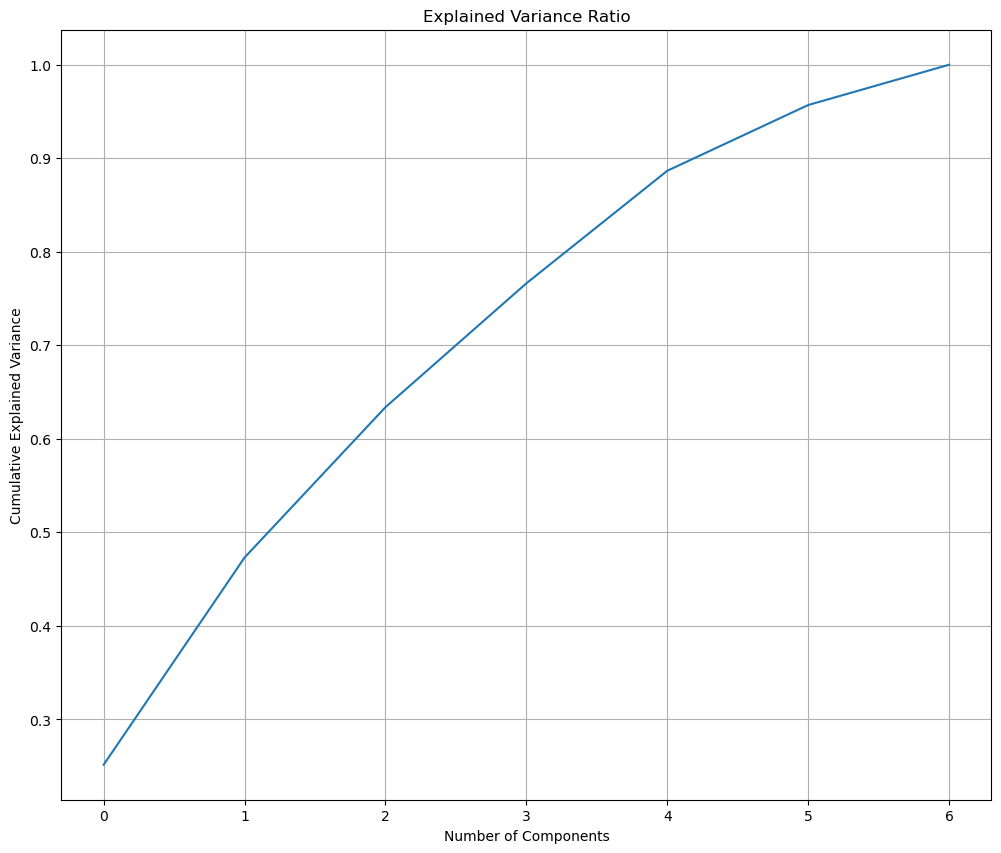

In [113]:
X_combined = np.vstack((X_train_clean, X_test_clean))
pca = PCA().fit(X_combined)

plt.figure(figsize=(12, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [121]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1
print("Number of components explaining 95% of the variance:", n_components)


Number of components explaining 95% of the variance: 6


In [116]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_clean)
X_test_pca = pca.transform(X_test_clean)
voting_hyper_pca = VotingClassifier(estimator_hyper)
voting_hyper_pca.fit(X_train_pca, y_train_clean)
y_pred_pca = voting_hyper_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_clean, y_pred_pca)
print(classification_report(y_test_clean, y_pred_pca))


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Us

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       381
           1       0.86      0.84      0.85       383

    accuracy                           0.85       764
   macro avg       0.85      0.85      0.85       764
weighted avg       0.85      0.85      0.85       764



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Admin\a

In [118]:
acc_pca = accuracy_score(y_test_clean, y_pred_pca)
print(classification_report(y_test_clean, y_pred_pca))
print(acc_pca)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       381
           1       0.86      0.84      0.85       383

    accuracy                           0.85       764
   macro avg       0.85      0.85      0.85       764
weighted avg       0.85      0.85      0.85       764

0.8520942408376964


So after using pca, the result decreased maybe due to the fact that the features are approximately important and that the number of features is inherently small so i will kepp the result after eliminnating outlier

In [123]:
y_pred_clean = voting_hyper.predict(X_test_clean)
acc = accuracy_score(y_test_clean, y_pred_clean)
print('This is my accuracy score', acc)
print(classification_report(y_test_clean, y_pred_clean))

This is my accuracy score 0.9057591623036649
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       381
           1       0.91      0.90      0.91       383

    accuracy                           0.91       764
   macro avg       0.91      0.91      0.91       764
weighted avg       0.91      0.91      0.91       764



# There is something I need to address here: there is an imbalance in the target feature which I haven't yet dealt with. However, this will be the end of my notebook, since my primary goal was to use Voting and PCA to enhance the model's performance. In future notebooks, I will incorporate these learned skills to enhance and improve the overall results and accuracy of the model.